In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os 
import pathlib
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


2024-01-04 14:35:33.320139: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 14:35:33.538731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 14:35:33.538817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 14:35:33.575739: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 14:35:33.653056: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data_dir = pathlib.Path("Datasets/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

Shape (512, 512, 3)
0 255


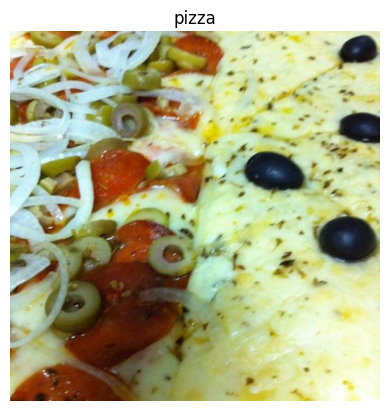

In [4]:
import random


def view_random_images(target_dir, target_class):
    target_folder = target_dir + "/" + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img, cmap='viridis', vmin=0, vmax=255)
    plt.title(target_class)
    plt.axis("off")
    print("Shape", img.shape)
    print(img.min(), img.max())
view_random_images("Datasets/pizza_steak/train", "pizza")

In [13]:
tf.random.set_seed(69)

train_data_gen = ImageDataGenerator(rescale=1./ 255,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    )
valid_datagen = ImageDataGenerator(rescale=1./255)

train_path = "Datasets/pizza_steak/train/"
test_path = "Datasets/pizza_steak/test/"



In [14]:
train_data = train_data_gen.flow_from_directory(train_path,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_path,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
'''history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))'''

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


'history_1 = model_1.fit(train_data,\n                        epochs=5,\n                        steps_per_epoch=len(train_data),\n                        validation_data=valid_data,\n                        validation_steps=len(valid_data))'

In [7]:
#model_1.summary()

In [8]:
"0.8587 - val_loss: 0.3303 - val_accuracy: 0.8600"

'0.8587 - val_loss: 0.3303 - val_accuracy: 0.8600'

In [16]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history2 = model_2.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/10


2024-01-04 15:17:02.243718: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


47/47 [==============================] - 11s 188ms/step - loss: 0.6317 - accuracy: 0.6493 - val_loss: 0.4792 - val_accuracy: 0.8060
Epoch 2/10
47/47 [==============================] - 9s 182ms/step - loss: 0.5141 - accuracy: 0.7660 - val_loss: 0.3626 - val_accuracy: 0.8580
Epoch 3/10
47/47 [==============================] - 9s 185ms/step - loss: 0.4814 - accuracy: 0.7807 - val_loss: 0.3758 - val_accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 9s 181ms/step - loss: 0.4489 - accuracy: 0.8007 - val_loss: 0.3222 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 9s 181ms/step - loss: 0.4587 - accuracy: 0.7987 - val_loss: 0.3794 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 8s 180ms/step - loss: 0.4531 - accuracy: 0.8013 - val_loss: 0.3916 - val_accuracy: 0.8200
Epoch 7/10
47/47 [==============================] - 8s 179ms/step - loss: 0.4407 - accuracy: 0.8040 - val_loss: 0.3753 - val_accuracy: 0.8300
Epoch 8/10
47/47

<Axes: >

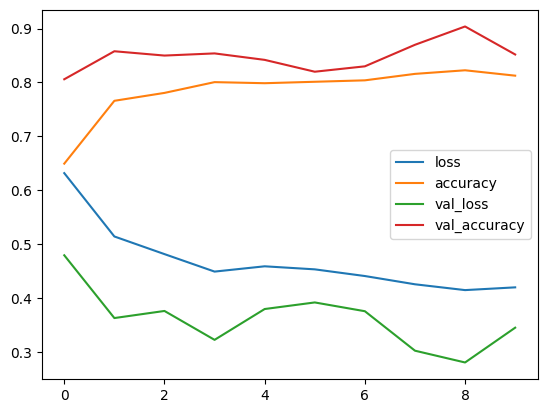

In [17]:
pd.DataFrame(history2.history).plot()

In [ ]:
model_2.summary()

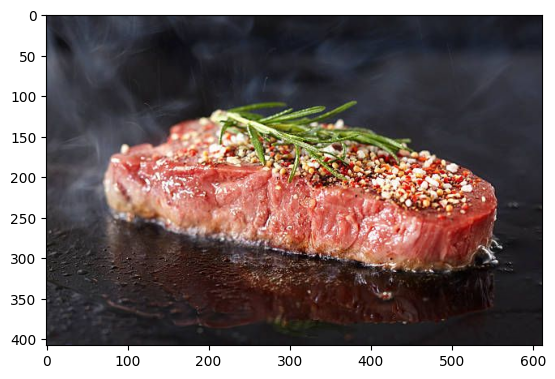

In [24]:
steak = mpimg.imread("images/steak.jpg")
plt.imshow(steak, cmap='viridis', vmin=0, vmax=255)

In [43]:
import tensorflow as tf


def load_prep_image(image_name_path):
    
    steak_tensor = tf.io.read_file(image_name_path)
    steak_tensor = tf.image.decode_image(steak_tensor)
    steak_tensor = tf.expand_dims(steak_tensor, axis=0)
    steak_tensor = tf.image.resize(steak_tensor, size=[224, 224])
    steak_tensor = steak_tensor/255.
    return steak_tensor


In [46]:
our_steak = load_prep_image("images/steak.jpg")
model_2.predict(our_steak)

1/1 [==============================] - 0s 137ms/step


array([[0.7242229]], dtype=float32)

In [47]:
our_pizza = load_prep_image("images/pizza.jpg")
model_2.predict(our_pizza)

1/1 [==============================] - 0s 15ms/step


array([[0.14926745]], dtype=float32)